<a href="https://colab.research.google.com/github/deathstar1/DeepLAcrobatgame/blob/master/CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf 

from tensorflow import keras

fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:

(train_data , train_label) , (test_data , test_label ) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

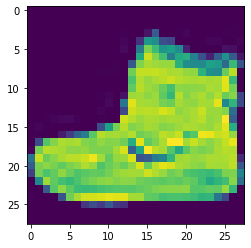

In [5]:
import numpy as np 
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
print(train_data[0])
print(train_label[0])
print(train_data.shape)

In [6]:
train_data =train_data.reshape(60000,28,28,1)
test_data =  test_data.reshape(10000,28,28,1)

In [7]:
train_data =  train_data/255.0

In [8]:
test_data = test_data/255.0

In [9]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')< 0.18):
      self.model.stop_training = True

In [10]:
callbacks = mycallback()

In [11]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu' , input_shape = (28,28,1)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu' ),
                             tf.keras.layers.MaxPooling2D(2,2),
                             keras.layers.Flatten() ,
                            tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                            keras.layers.Dense(10, activation=tf.nn.softmax)])

In [12]:
model.compile(optimizer=tf.optimizers.Adam() , loss ='sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1

In [14]:
model.fit(train_data,train_label , epochs = 10, callbacks = [callbacks])

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4279 - accuracy: 0.8402
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2773 - accuracy: 0.8971
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2321 - accuracy: 0.9135
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2000 - accuracy: 0.9234
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1703 - accuracy: 0.9359


In [15]:
model.evaluate(test_data,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.2666 - accuracy: 0.9063


[0.26664701104164124, 0.9063000082969666]

In [16]:
classifications = model.predict(test_data)

[9.7613093e-16 1.0000000e+00 1.4854271e-15 9.9272119e-09 6.1607105e-14 3.0779437e-19 2.2707266e-13 5.3829931e-19 1.0704273e-15 1.0572806e-19]
tf.Tensor([28 28  1], shape=(3,), dtype=int32)


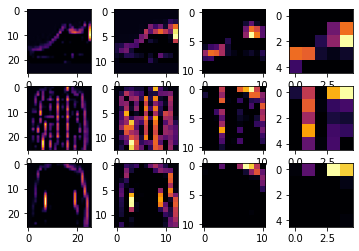

In [18]:
print(classifications[2])
print(tf.shape( test_data[2]))

# plt.imshow(test_data[2].reshape(1,28,28,1))



import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 2
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_data[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_data[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_data[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)